# 03. 평가

* 성능 평가 지표(Evaluation Metrics)
    - 회귀 : 예측 오차 등(5장에서 다룰 예정)
    - 분류 : 정확도(Accuracy), 오차행렬(Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1-Score, ROC, AUC

## 01. 정확도(Accuracy)

* 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

    > 정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

- 직관적으로 모델 예측 성능을 나타내는 평가지표 / 이진 분류의 경우 ML 모델 성능을 왜곡할 수 있어 정확도 하나만 가지고 성능 평가하지는 않음.

### 아무 학습을 하지 않고 성별에 따라 Titanic 생존자를 예측하는 예시

In [2]:

from sklearn.base import BaseEstimator
import numpy as np

#분류기 1
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass

    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1))
        for i in range(X.shape[0]):  #sex==1, survived=0으로 예측, 아니면 1로 예측
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df) 
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load 
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic = titanic_df['Survived']
X_titanic = titanic_df.drop('Survived', axis=1)

#전처리
X_titanic = transform_features(X_titanic)

# 데이터셋 분할
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33968\2334727292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33968\2334727292.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [5]:
# 모델 생성 및 학습 
myclf = MyDummyClassifier() 
myclf.fit(X_train_titanic, y_train_titanic)

In [6]:
# 정확도 평가
my_pred_titanic = myclf.predict(X_test_titanic)

accuracy_score(y_test_titanic, my_pred_titanic)

0.7877094972067039

### 불균형한 MNIST 데이터 세트에 정확도 지표 적용 예시

In [7]:


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


> 결론
- 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 높은 수치가 나올 수 있기에 평가 지표로 사용할 때에는 매우 신중해야 함.
- 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단하기에 적합한 지표가 아님.  
    -> 한계 극복 방법 : 여러가지 분류 지표를 적용하여 ML 모델 성능 평가

## 02. 오차행렬

* 오차행렬(confusion matrix, 혼동행렬) : 이진분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
    - TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
    - FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
    - FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
    - TP : 예측값을 Positive 값 1로 예측했고 실제 값은 Positive 값 1
* 출처 : 강의 교안  
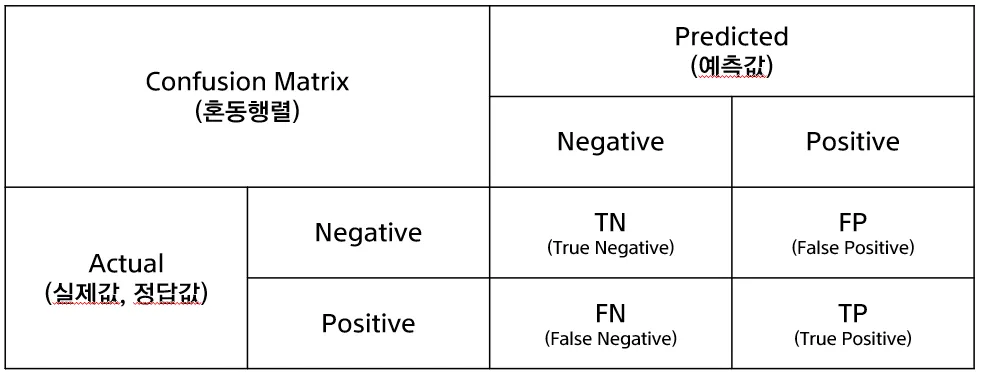

* 정확도 : 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP) / (TN + TP + FN + FP)
    - 비대치한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Nagative에 대한 예측 정확도만으로 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류 발생 가능
    - -> 모델 신뢰도 하락
    - -> 불균형한 데이터 세트에서는 정확도 보다 정밀도(Precision)와 재현율(Recall)이 더욱 선호됨.

* 오차 행렬: confusion_matrix()

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred) #row : 실제값, col : 예측

array([[405,   0],
       [ 45,   0]])

## 03. 정밀도와 재현율

* Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
    - 정밀도(=양성 예측도) : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 = TP / (FP + TP)
    - 재현율(=민감도(Sensitivity), TPR(True Positive Rate)) : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 = TP / (TP + FN)
* 이진 분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있음.
    - 재현율이 중요 지표인 경우 : 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 암 판단 모델, 보험 사기 적발 모델
    - 정밀도가 중요 지표인 경우 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 스팸메일
* 정밀도는 FP를 낮추는데, 재현율은 FN을 낮추는데 초점을 둠.
    - 서로 보완적인 지표로 분류의 성능을 평가하는데 적용됨.
    - 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것임.

* 정밀도 : precision+score()
* 정확도 : recall_score()

In [10]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_titanic, my_pred_titanic) ,recall_score(y_test_titanic, my_pred_titanic)

(0.7313432835820896, 0.7101449275362319)

In [11]:
# 교재 함수 코드
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [12]:
# 로지스틱 회귀 기반 타이타닉 생존자 예측 및 평가 수행 (함수 사용)

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear') # liblinear : 작은 데이터 세트의 이진 분류인 경우 약간 성능이 좋은 로지스틱 회귀의 최적화 알고리즘 / 기본값은 lbfgs

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33968\2334727292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33968\2334727292.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### 정밀도 / 재현율 트레이드 오프

* 정밀도 / 재현율 조정 : 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율 강조 가능
* Trade-off(트레이드 오프) : 정밀도와 재현율은 상호 보완적인 평가지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움

> 사이킷런 분류 알고리즘
- 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
- 예측 확률이 큰 레이블 값으로 예측함 ex) 이진 분류 모델에서 특정 데이터가 0이 될 확률 10%, 1이 될 확률 90%일 경우 1로 예측
- 일반적으로 이진 분류에서는 임곗값을 0.5로 정하고, 기준값보다 확률이 크면 positive 작으면 negative로 예측

> predict_proba() : 개별 데이터별로 예측 확률 반환 메서드

- 학습이 완료된 사이킷런 Classifier 객체에서 호출 가능하며, 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함.
- predict()과 유사하지만 반환결과가 예측 결과 클래스 값이 아닌 예측 확률 결과라는 차이가 있음. (predict()는 predict_proba()에 기반해 생성된 AIP)

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


**Binarizer 활용**
- Binarizer 클래스 객체 생성
- fit_transform 메소드 활용, threshold 변수를 특정값으로 설정

In [14]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [15]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


분류 결정 임곗값은 positive 예측값을 결정하는 확률이며, 이를 낮춰 너그럽게 예측하였으므로 true값이 많아짐.  
positive 예측값이 많아지면 상대적으로 재현율 값이 높아지는데, 이는 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문임.  
따라서 재현율 값이 올라가고 정밀도가 떨어짐.

**여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환**

In [17]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


> 저자의 분석 : 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야한다면, 임곗값 0.45가 적당함.
- 일반적인 수치 분석 가이드라인

| 지표       | 우수         | 양호        | 개선 필요  |
|----------|-------------|------------|------------|
| 정확도    | >= 0.85     | 0.75~0.85  | < 0.75     |
| 정밀도    | >= 0.80     | 0.70~0.80  | < 0.70     |
| 재현율    | >= 0.80     | 0.70~0.80  | < 0.70     |
| F1 점수   | >= 0.70     | -          | < 0.70     |
| AUC       | >= 0.90     | 0.80~0.90  | < 0.80     |

- 용어 설명
    - 정확도 (Accuracy): 모델이 정확히 예측한 비율.
    - 정밀도 (Precision): 양성 예측 중 실제 양성 비율.
    - 재현율 (Recall): 실제 양성 중 정확히 예측한 비율.
    - F1 점수 (F1 Score): 정밀도와 재현율의 조화 평균.
    - AUC (Area Under the Curve): ROC 곡선 아래 영역의 면적. 이 값이 클수록 분류기의 성능이 좋음
    - ROC (Receiver Operating Characteristic) Curve: 모델의 진짜 양성 비율 (재현율)과 거짓 양성 비율을 시각화한 곡선.

**precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출**

In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974988 0.06956414 0.08402809 0.08474207 0.08920161]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


**임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

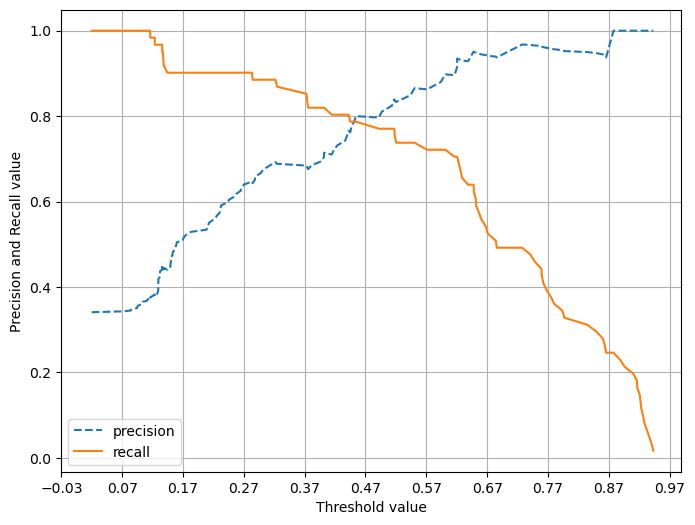

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

### 정밀도와 재현율의 맹점

- 임곗값은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 함. (하나의 성능지표 수치를 높이기 위한 수단으로 사용돼서는 안됨.)
    1. 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 positive로 예측, 나머지는 모두 negative로 예측
    2. 재현율 100%가 되는 방법 : 모든 경우를 positive로 예측

## 04. F1 스코어

- F1 스코어 : 정밀도와 재현율의 조화평균 (치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐)
- f1_score() AIP

In [20]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [21]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


## 05. ROC 곡선과 AUC

- ROC 곡선(Receiver Operation Characteristic Curve, 수신자 판단 곡선) : FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선
    - TPR(민감도, 재현율) : 실제값 Positive가 정확히 예측되어야 하는 수준, TP / (FN + TP)
    - TNR(특이성) : 실제값 Negative가 정확히 예측되어야 하는 수준, TN / (FP + TN)
    - FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성

즉,  
ROC : 민감도 어떻게 달라지는지 보는 지표 (=재현율, 실제 양성을 맞춘 비율)
- 거짓긍정율 = 1- 특이도
- 좌측상단 > 1에 가까울 수록 좋은 모델
- ROC-AUC : ROC 곡선 아래 면적값, 더 클 수록 좋은 모델

roc_curve()

In [23]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.9432627941298161
thresholds[0]: inf
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [ inf 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


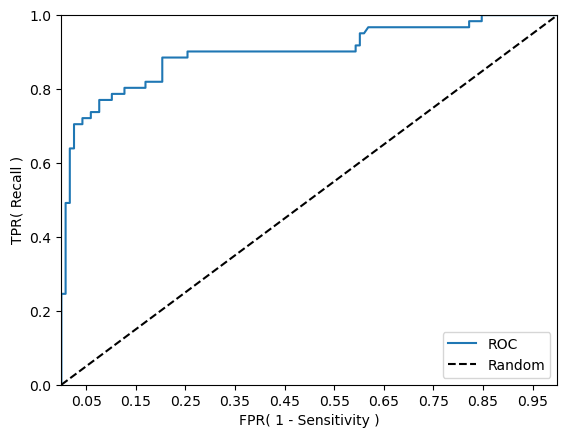

In [24]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

ROC-AUC

In [25]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [26]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))